In [1]:
!gdown 14hIKT9eOKYliX8_nJQ4c7DwnlXjPXlRX

Downloading...
From: https://drive.google.com/uc?id=14hIKT9eOKYliX8_nJQ4c7DwnlXjPXlRX
To: /content/ds105.csv
100% 251k/251k [00:00<00:00, 79.2MB/s]


In [2]:
import pandas as pd
df = pd.read_csv('/content/ds105.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-2-e6696accf727>:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1081 non-null   object 
 1   Laptop Type        1081 non-null   object 
 2   Laptop Brand       1081 non-null   object 
 3   Price              1081 non-null   int64  
 4   Price New          1081 non-null   int64  
 5   CPU                1081 non-null   object 
 6   CPU Brand          1081 non-null   object 
 7   Ram Size           1081 non-null   int64  
 8   Ram Type           1081 non-null   object 
 9   Hard Drive Size    1081 non-null   int64  
 10  Hard Drive         1081 non-null   object 
 11  Screen             1081 non-null   float64
 12  Resolution         1081 non-null   object 
 13  Material           1081 non-null   object 
 14  OS                 1081 non-null   object 
 15  Year               1081 non-null   int64  
 16  Graphic            1081 

In [4]:
df['Price'] =  df['Price'] / 1000000
df['Price New'] =  df['Price New'] / 1000000

In [5]:
df.tail(5)

,Name,Laptop Type,Laptop Brand,Price,Price New,CPU,CPU Brand,Ram Size,Ram Type,Hard Drive Size,Hard Drive,Screen,Resolution,Material,OS,Year,Graphic,Graphic Name,Weight,Warranty Time,Warranty Location
1076,Laptop MSI Gaming Cyborg 15 A12VE,gaming,MSI,24.37,27.49,Intel Core i7 Alder Lake - 12650H,Intel,8,DDR5,512,SSD,15.6,Full HD,Vỏ nhựa,Windows 11 Home SL,2022,Card rời,"NVIDIA GeForce RTX 4050, 6 GB",1.98,22.5,Chính Hãng
1077,Laptop Apple MacBook Pro 13 inch M2 2022,general,Apple,28.64,35.39,Apple M2,Apple,8,Apple,512,SSD,13.3,Retina,Vỏ kim loại,macOS,2022,Card tích hợp,10 nhân GPU,1.40,9.5,Chính Hãng
1078,Laptop MSI Modern 15 B12MO,general,MSI,12.98,14.49,Intel Core i5 Alder Lake - 1235U,Intel,16,DDR4,512,SSD,15.6,Full HD,Vỏ nhựa,Windows 11 Home SL,2023,Card tích hợp,Intel Iris Xe Graphics,1.70,23.5,Chính Hãng
1079,Laptop HP Elitebook 630 G10,general,HP,24.64,27.79,Intel Core i7 Raptor Lake - 1355U,Intel,16,DDR4,512,SSD,13.3,Full HD,Vỏ kim loại,Windows 11 Home SL,2023,Card tích hợp,Intel UHD Graphics,1.22,10.5,Chính Hãng
1080,Laptop Apple MacBook Pro 13 inch M2 2022,general,Apple,28.78,35.39,Apple M2,Apple,8,None,512,SSD,13.3,Retina,Vỏ kim loại,macOS,2022,Card tích hợp,10 nhân GPU,1.40,10.0,Chính Hãng


# 1. Exploratory data analysis (EDA)

Text(0.5, 1.0, 'Biểu đồ phân phối của giá tiền')

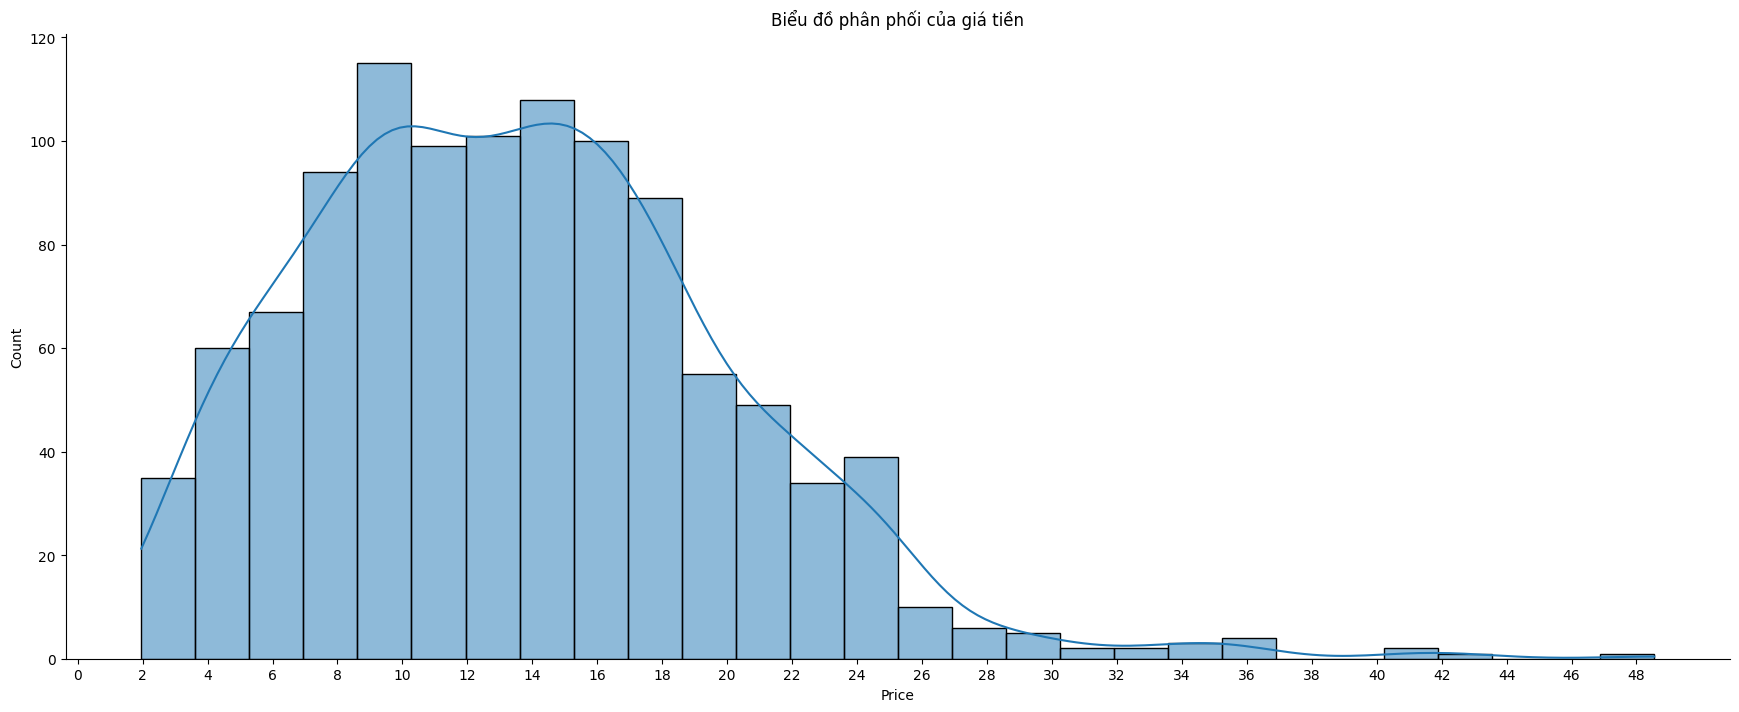

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.displot(data=df, x="Price", kde=True, kind='hist', height=7, aspect=2.5)
plt.xticks(np.arange(0, df['Price'].max(), 2))
plt.title('Biểu đồ phân phối của giá tiền')

## 1.1 Numerical

In [7]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Price', 'Price New', 'Ram Size', 'Hard Drive Size', 'Screen', 'Year', 'Weight',
       'Warranty Time'],
      dtype='object')

In [8]:
df[numerical_columns].describe()

,Price,Price New,Ram Size,Hard Drive Size,Screen,Year,Weight,Warranty Time
count,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000
mean,13.573330,21.121277,10.020352,473.280296,14.821924,2021.808511,1.664596,13.695652
std,6.479791,10.088844,4.570796,211.837718,1.035737,0.762162,0.354309,7.498788
min,1.960000,3.990000,4.000000,128.000000,11.600000,2018.000000,0.890000,1.000000
25%,8.840000,14.490000,8.000000,512.000000,14.000000,2021.000000,1.400000,8.500000
50%,13.110000,19.990000,8.000000,512.000000,15.600000,2022.000000,1.650000,11.000000
75%,17.470000,26.590000,16.000000,512.000000,15.600000,2022.000000,1.800000,20.000000
max,48.550000,79.990000,32.000000,2048.000000,17.300000,2023.000000,2.900000,35.000000


### Histogram

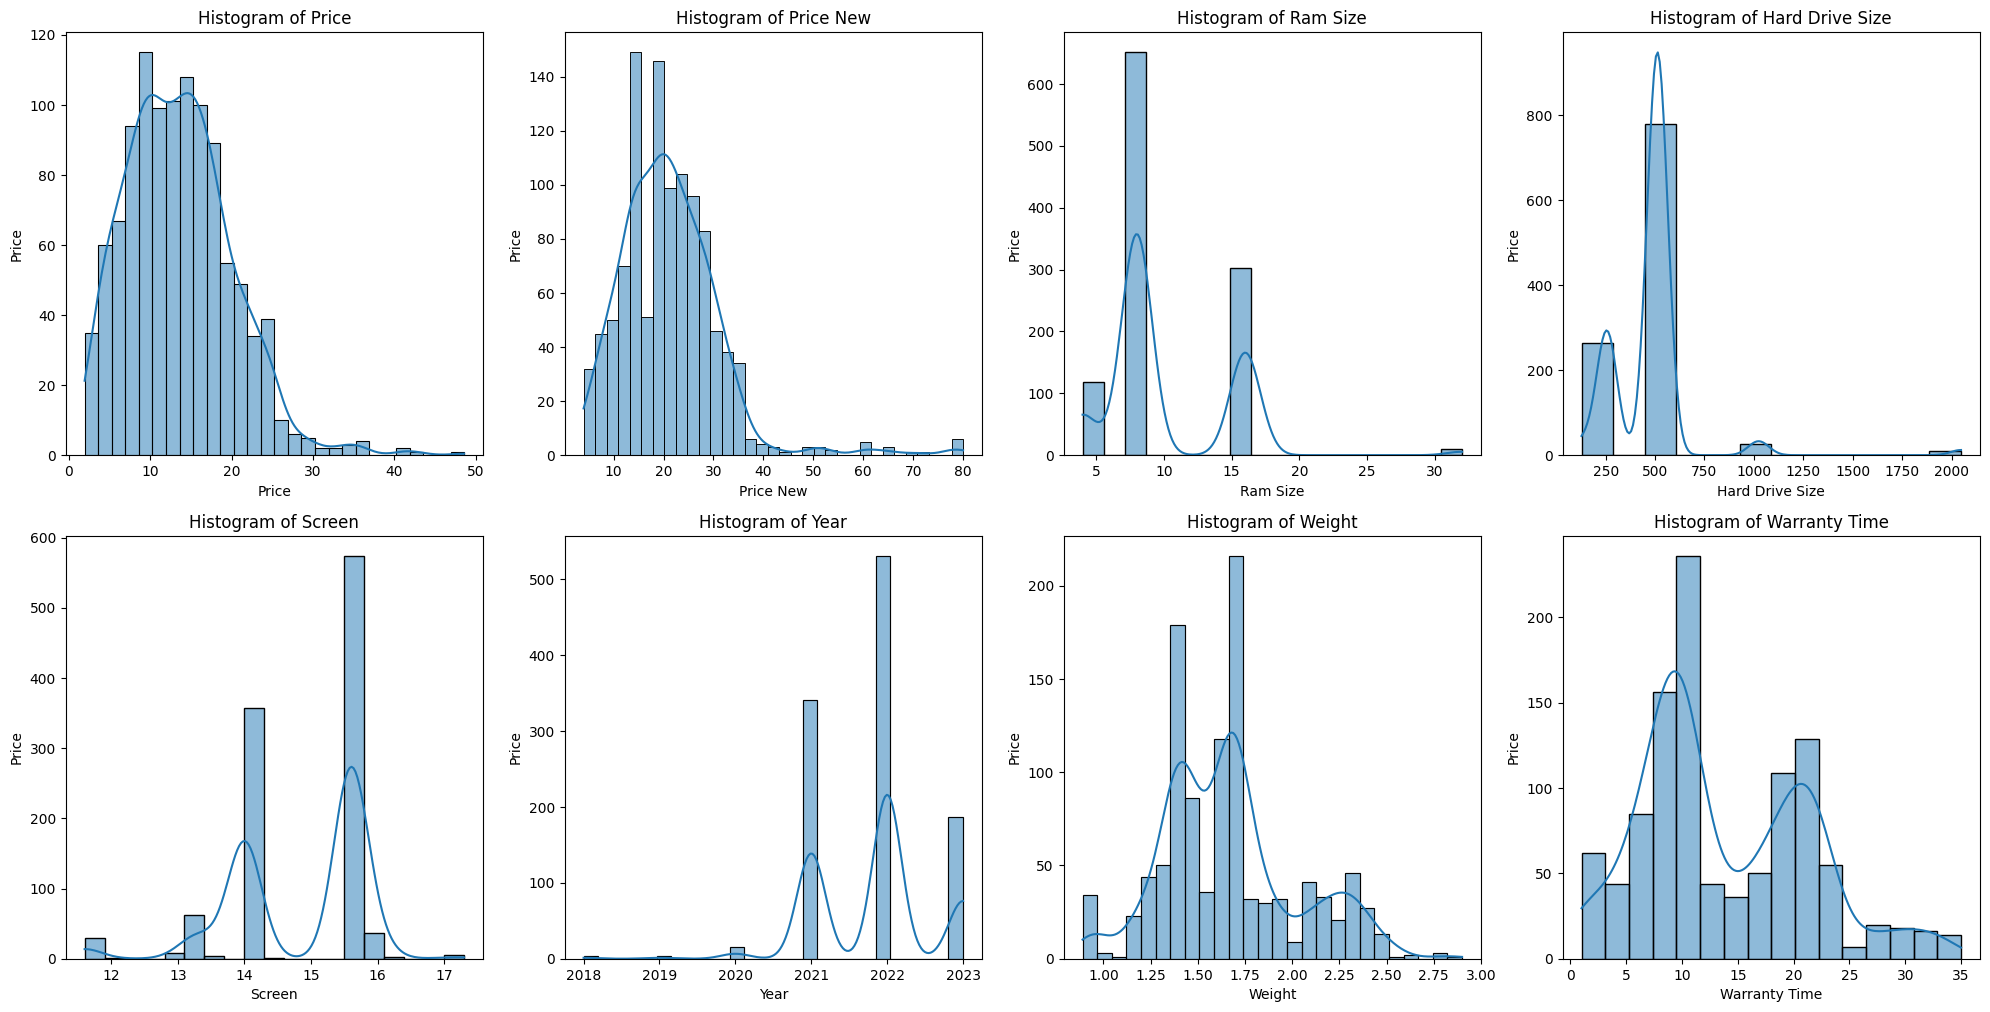

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 40))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(8, 4, i)
    sns.histplot(x=col, data=df, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

 **Nhận xét:**

 Quan sát hình, ta thấy biến **"Price", "Price New",** dữ liệu phân phối lệch về bên phải (right skewed). Ngoài ra có thể thấy biến **Weight** số điểm dữ liệu trùng lắp rất thấp dường như là phân phối đều.

### Regression plot

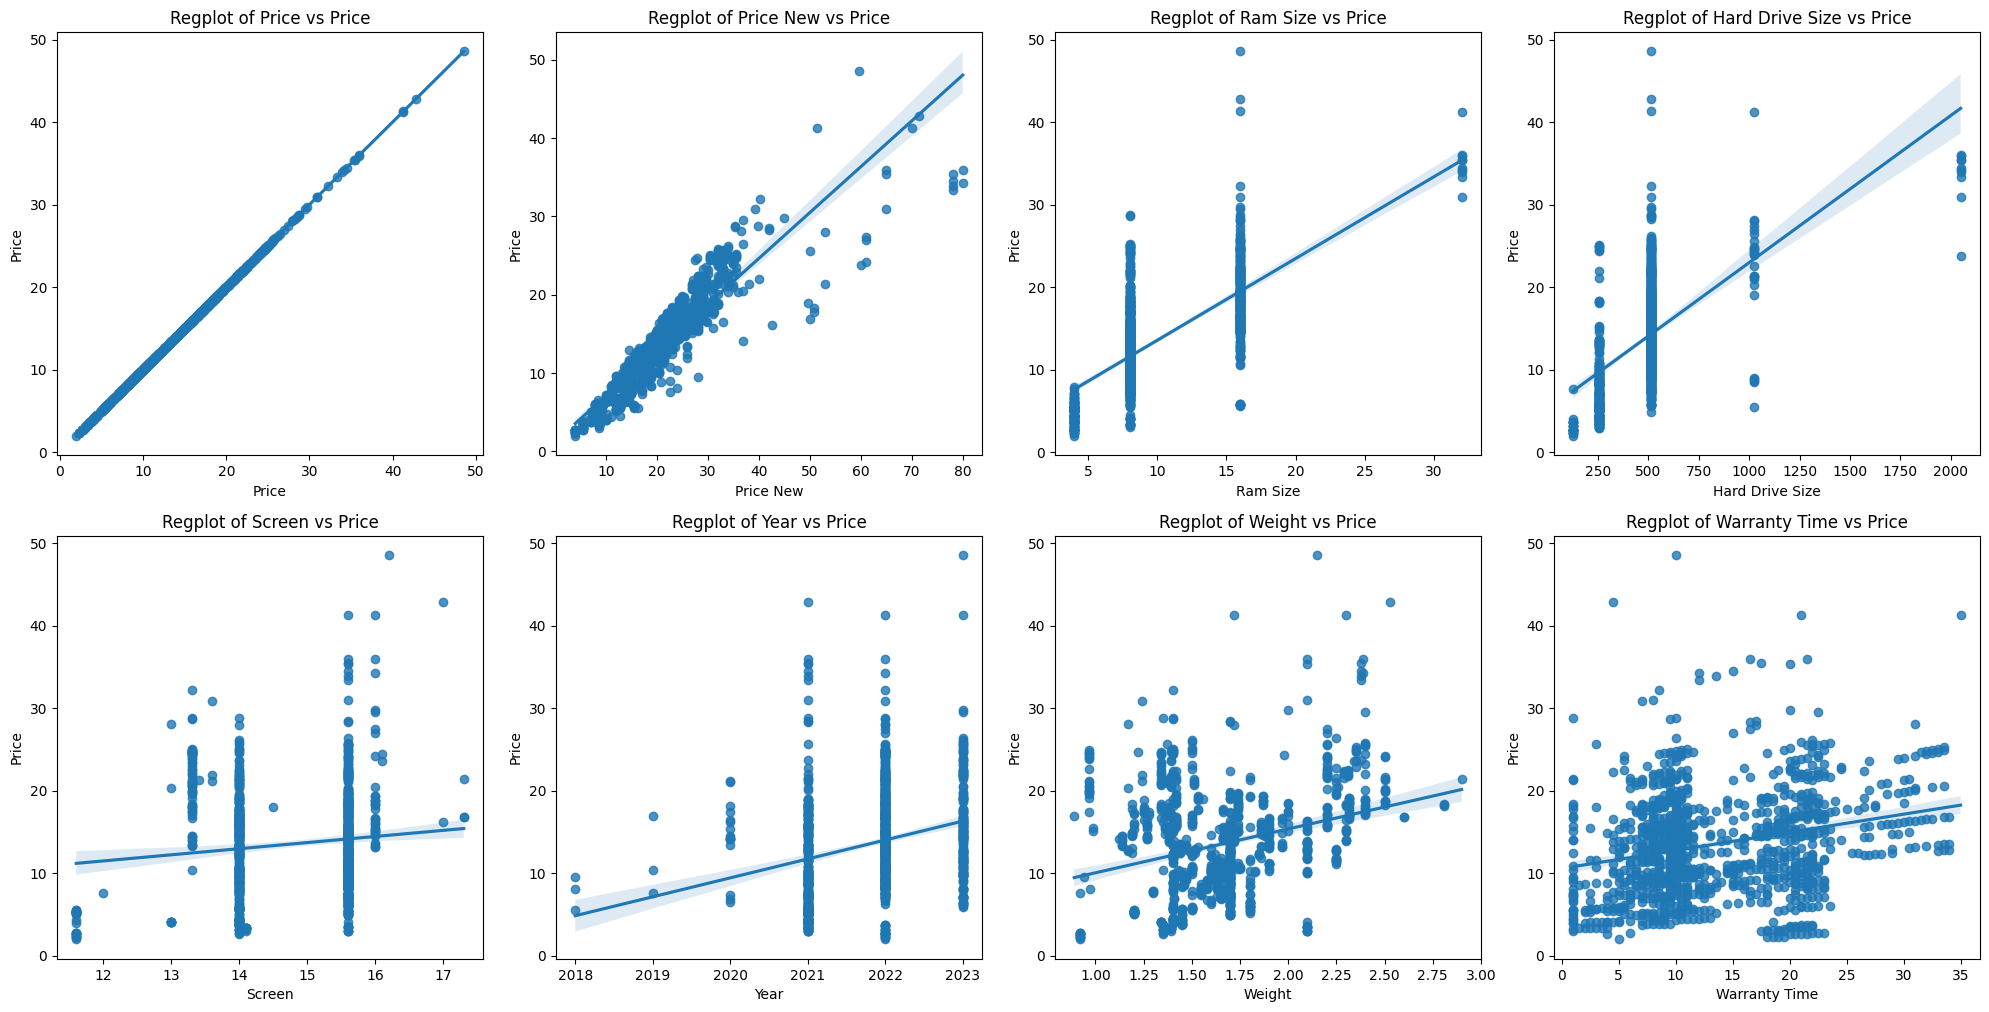

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 40))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(8, 4, i)
    sns.regplot(x=col, y='Price', data=df)
    plt.title(f'Regplot of {col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

 **Nhận xét:**

 Quan sát hình, ta thấy biến **"Price New"** có mối tương quan đồng biến với biến **Price** ở mức tương quan mạnh, biến **Warranty Time** có mối quan hệ đồng biến nhưng ở mức tương quan thấp hơn.

### Residual plot

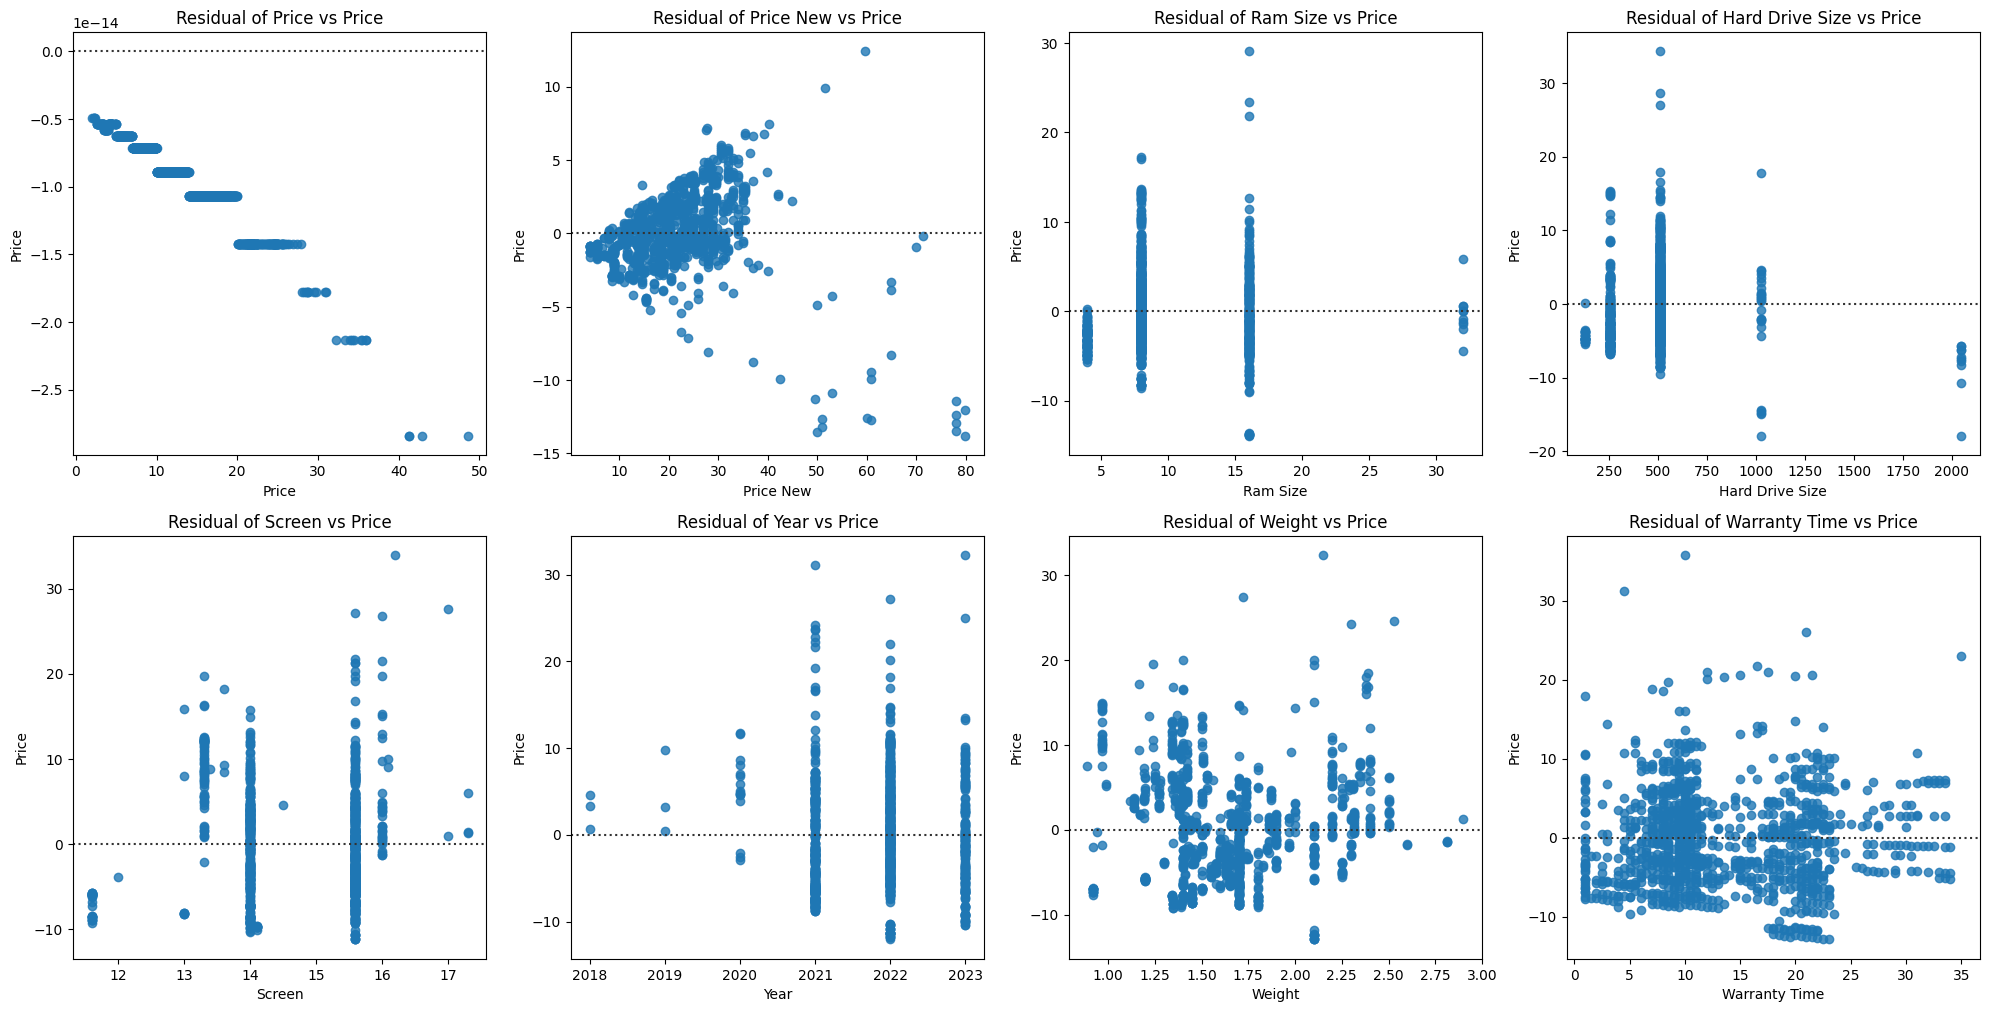

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 40))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(8, 4, i)
    sns.residplot(x=col, y='Price', data=df)
    plt.title(f'Residual of {col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

### Correlation matrix

<ipython-input-12-38bea3bfd6ca>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr(method='pearson')


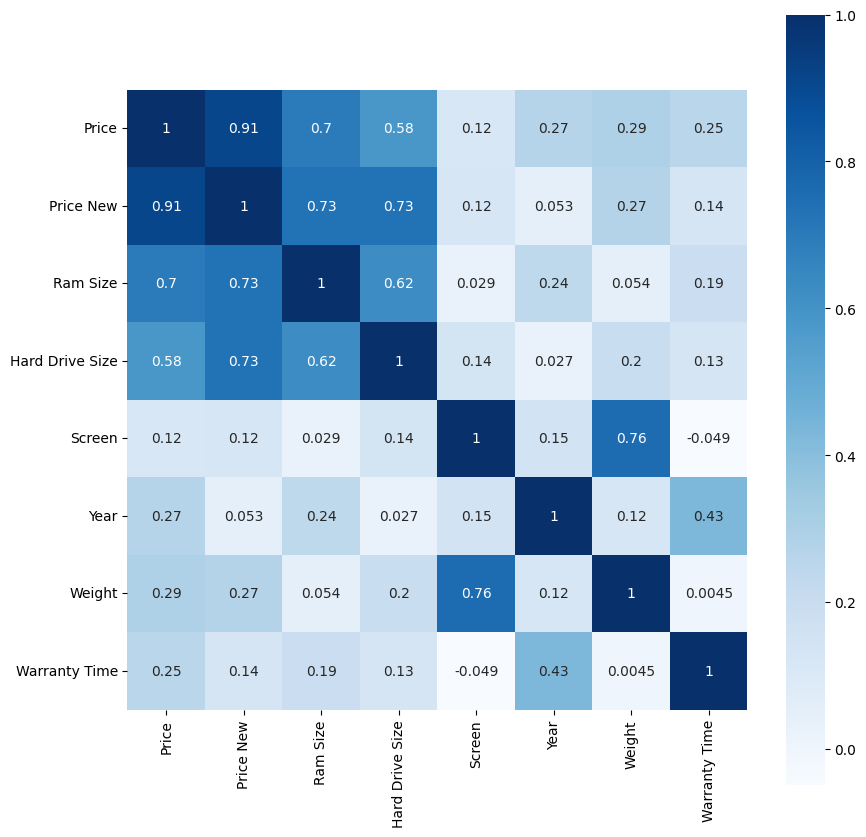

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr(method='pearson')
fig = plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues');

In [13]:
from scipy import stats
list_pearson = []
list_pvalue = []
list_certainly = []

for i in numerical_columns:
  Pearson_coef, p_value = stats.pearsonr(df[i],df['Price'])
  list_pearson.append(round(Pearson_coef*100,4))
  list_pvalue.append(p_value)
  if p_value < 0.001:
    list_certainly.append("Strong")
  elif p_value < 0.05:
    list_certainly.append("Moderate")
  elif p_value < 0.1:
    list_certainly.append("Weak")
  elif p_value > 0.1:
    list_certainly.append("No")

df_pvalue = pd.DataFrame({'Feature':numerical_columns, 'Pearson Coef':list_pearson, 'P value':list_pvalue, 'Certainly':list_certainly})
df_pvalue

,Feature,Pearson Coef,P value,Certainly
0,Price,100.0000,0.000000e+00,Strong
1,Price New,91.1192,0.000000e+00,Strong
2,Ram Size,69.9107,2.228102e-159,Strong
3,Hard Drive Size,58.3103,1.818396e-99,Strong
4,Screen,11.8356,9.595220e-05,Strong
5,Year,26.9649,1.828789e-19,Strong
6,Weight,29.0558,1.786567e-22,Strong
7,Warranty Time,25.3656,2.473026e-17,Strong



### Nhận Xét

**Nhận xét:**  Từ kết quả phân tích Pearson Coef, P-Value có thể thấy biến **Price New, Ram Size, Hard Drive Size** có mức độ tương quan mạnh với P-Value < 0.05 sử dụng để phát triển mô hình. Các biến như **Warranty Time, Year** có thể cân nhắc để phát triển mô hình. Hai biến **Weight, Screen** không phù hợp để phát triển mô hình.

### Other

In [14]:
import plotly.express as px
import pandas as pd
fig = px.scatter(df, x='Warranty Time', y=(1-df['Price']/df['Price New'])*100,
                 color='Warranty Location', size='Price',
                 labels={'Warranty Time': 'Thời gian bảo hành',
                         'y': 'Tỉ lệ Chênh Lệch Giá (%)'})
fig.show()

In [15]:
import plotly.express as px
import pandas as pd
fig = px.scatter(df, x="Laptop Brand", y=(1-df['Price']/df['Price New'])*100,
                  color="Year", size='Price',
                  labels={'y': 'Tỉ lệ Chênh Lệch Giá (%)'})
fig.show(width=800, height=500)

In [16]:
import plotly.express as px
import pandas as pd
fig = px.scatter(df, x='Weight', y='Price',
                 color='Laptop Type',
                 labels={'y': 'Tỉ lệ Chênh Lệch Giá'})
fig.show()

### Create New Fetures

In [17]:
import pandas as pd

def warranty_value(row):
    factor = 0
    if row["Warranty Location"] == "Chính Hãng":
        factor = 1.5
    elif row["Warranty Location"] == "Cửa Hàng":
        factor = 1
    value = (row["Warranty Time"] * factor)
    return value

df["Warranty Value"] = df.apply(warranty_value, axis=1)

df.head()

,Name,Laptop Type,Laptop Brand,Price,Price New,CPU,CPU Brand,Ram Size,Ram Type,Hard Drive Size,Hard Drive,Screen,Resolution,Material,OS,Year,Graphic,Graphic Name,Weight,Warranty Time,Warranty Location,Warranty Value
0,Laptop Acer Swift 5 SF514 53T 51EX,general,Acer,8.13,23.99,Intel Core i5 Coffee Lake - 8265U,Intel,8,DDR4,256,SSD,14.0,Full HD,Nhôm - Magie,Windows 10 Home SL,2018,Card tích hợp,Intel UHD Graphics 620,0.97,1.0,Cửa Hàng,1.0
1,Laptop Acer Swift 5 SF514 53T 51EX,general,Acer,9.48,27.99,Intel Core i7 Coffee Lake - 8565U,Intel,8,DDR4,256,SSD,14.0,Full HD,Nhôm - Magie,Windows 10 Home SL,2018,Card tích hợp,Intel UHD Graphics 620,0.94,1.0,Cửa Hàng,1.0
2,Laptop Acer Swift 3 SF314 54 51QL,general,Acer,5.52,16.29,Intel Core i5 Kabylake Refresh - 8250U,Intel,4,DDR4,1024,HDD,14.0,Full HD,Vỏ kim loại,Windows 10 Home SL,2018,Card tích hợp,Intel HD Graphics 620,1.50,1.0,Cửa Hàng,1.0
3,Laptop CHUWI CoreBook X,general,CHUWI,5.58,15.49,Intel Core i5 Coffee Lake - 8259U,Intel,16,DDR4,512,SSD,14.0,2.2K,Vỏ kim loại,Windows 10 Home SL,2021,Card tích hợp,Intel Iris Plus Graphics 655,1.50,1.0,Cửa Hàng,1.0
4,Laptop Acer Switch 5 SW512 52P 34RS,general,Acer,7.62,22.49,Intel Core i3 Kabylake - 7130U,Intel,4,DDR3L,128,SSD,12.0,2K,Vỏ kim loại,Windows 10 Home SL,2019,Card tích hợp,Intel UHD Graphics 620,0.92,1.0,Cửa Hàng,1.0


In [18]:
Pearson_coef, p_value = stats.pearsonr(df['Warranty Value'],df['Price'])
print("Pearson_coef: ", Pearson_coef, ", p_value: ", p_value)

Pearson_coef:  0.2500475702658754 , p_value:  7.145559589565933e-17


## 1.2 Categorical

In [19]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Name', 'Laptop Type', 'Laptop Brand', 'CPU', 'CPU Brand', 'Ram Type', 'Hard Drive',
       'Resolution', 'Material', 'OS', 'Graphic', 'Graphic Name', 'Warranty Location'],
      dtype='object')

In [20]:
import scipy.stats as stats

def anova(df, var: str, target: str):
  df_anova = df[[var, target]]
  group_anova = df_anova.groupby([var])
  values = df_anova[var].unique()
  groups = []
  for value in values:
    groups.append(group_anova.get_group(value)[target])
  F_test, P_value = stats.f_oneway(*groups)
  return F_test, P_value

In [21]:
for i in categorical_columns:
  F_test, P_value = anova(df, i, 'Price')
  if(P_value < 0.05):
    print(i, ": ", P_value)

Name :  0.0
Laptop Type :  1.1640993446974091e-32
Laptop Brand :  2.5677180045521078e-85
CPU :  2.902132777760677e-300
CPU Brand :  1.720141275616029e-14
Ram Type :  1.9951940070211922e-61
Hard Drive :  6.5815973930694115e-09
Resolution :  1.2674099499038785e-126
Material :  1.1376177290191939e-52
OS :  4.8559510956323224e-27
Graphic :  1.1180919755470494e-57
Graphic Name :  8.148688928088608e-243


In [22]:
for i in categorical_columns:
  F_test, P_value = anova(df, i, 'Price')
  if(P_value > 0.05):
    print(i, ": ", P_value)

Warranty Location :  0.09217963916885445


### Nhận Xét

 **Nhận xét:**  Từ kết quả phân tích Anova có thể thấy biến **Name, Laptop Type, Latop Brand, CPU, CPU Brand, Ram Type, Hard Drive, Resolution, Material, OS, Graphic, Graphic Name** đều có ý nghĩa thống kê và ảnh hưởng đến giá trị của xe có thể sử dụng để phát triển mô hình. Biến **Warranty Location** chưa đủ tin cậy để phát triển mô hình.

### Laptop Brand

In [23]:
import plotly.express as px

fig = px.histogram(df, x="Laptop Brand", color = "Laptop Brand")
fig.update_layout(title='Count plot')
fig.show()

In [24]:
import plotly.express as px

fig = px.box(df, x="Laptop Brand", y="Price", color="Laptop Brand")
fig.update_layout(xaxis_tickangle=-45, width=1000, height=500)
fig.show()
# title='Biểu đồ boxplot thể hiện tên thương hiệu và giá laptop cũ'

### Laptop Type

In [25]:
import plotly.express as px

fig = px.histogram(df, x="Laptop Type", color = "Laptop Type")
fig.update_layout(title='Count plot')
fig.show()

In [26]:
import plotly.express as px

fig = px.box(df, x="Laptop Type", y="Price", color="Laptop Type")
fig.update_layout(xaxis_tickangle=-45, width=600, height=500)
fig.show()

In [27]:
import plotly.express as px

fig = px.box(df, x="Laptop Type", y=(1-df['Price']/df['Price New'])*100, color="Laptop Type",
             labels={'y': 'Tỉ lệ Chênh Lệch Giá'})
fig.update_layout(xaxis_tickangle=-45, width=600, height=500)
fig.show()

In [28]:
import plotly.express as px
import numpy as np

df_2 = df.groupby(['Laptop Type', 'Laptop Brand']).size().reset_index(name='Count')
fig = px.sunburst(df_2, path=['Laptop Brand', 'Laptop Type'], values='Count',
                  color_continuous_scale='RdBu')

fig.show(width=1400, height=1400)

### CPU Brand

In [29]:
import plotly.express as px

fig = px.box(df, x="CPU Brand", y="Price", color="CPU Brand")
fig.update_layout(title='Biểu đồ hộp thể hiện loại CPU Brand và giá laptop cũ')
fig.show()

### Ram Type

In [30]:
import plotly.express as px

fig = px.box(df, x="Ram Type", y="Price", color="Ram Type")
fig.update_layout(xaxis_tickangle=-45, title='Biểu đồ hộp thể hiện loại Ram Type và giá laptop cũ')
fig.show()

### Hard Drive

In [31]:
import plotly.express as px

fig = px.box(df, x="Hard Drive", y="Price", color="Hard Drive")
fig.update_layout(title='Biểu đồ hộp thể hiện loại Hard Drive và giá laptop cũ')
fig.show()

### Resolution

In [32]:
import plotly.express as px

fig = px.box(df, x="Resolution", y="Price", color="Resolution")
fig.update_layout(xaxis_tickangle=-45, title='Biểu đồ hộp thể hiện loại Resolution và giá laptop cũ')
fig.show()

### OS

In [33]:
import plotly.express as px

fig = px.box(df, x="OS", y="Price", color="OS")
fig.update_layout(xaxis_tickangle=-45, title='Biểu đồ hộp thể hiện loại OS và giá laptop cũ')
fig.show()

### Graphic

In [34]:
import plotly.express as px

fig = px.box(df, x="Graphic", y="Price", color="Graphic")
fig.update_layout(title='Biểu đồ hộp thể hiện loại Graphic và giá laptop cũ')
fig.show()

### Warranty Location

In [35]:
import plotly.express as px

fig = px.box(df, x="Warranty Location", y="Price", color="Warranty Location")
fig.update_layout(title='Biểu đồ hộp thể hiện loại Warranty Location và giá laptop cũ')
fig.show()

## 1.3 Phân tích Anova

### Phân Tích Ảnh Hưởng Của Warranty Location, Warranty Time

In [36]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

df['Warranty_Time'] = pd.Categorical(df['Warranty Time'])
df['Warranty_Location'] = pd.Categorical(df['Warranty Location'])

model = ols('Price ~ C(Warranty_Time) + C(Warranty_Location)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                            sum_sq      df          F        PR(>F)
C(Warranty_Time)      7059.690522   67.0    2.793783   6.849239e-12
C(Warranty_Location)  526.612921    1.0     13.962828  1.968895e-04
Residual              38167.933407  1012.0 NaN        NaN          


**Nhận Xét:** Có thể thấy dựa trên kết quả phân tích ANOVA trên, có sự khác biệt đáng kể được tìm thấy giữa các nhóm của cả hai yếu tố **Warranty_Time** và **Warranty_Location** đối với sự chênh lệch **Price**.



In [37]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

df['Laptop_Brand'] = pd.Categorical(df['Laptop Brand'])
df['Year'] = pd.Categorical(df['Year'])

model = ols('Price ~ C(Laptop_Brand) + C(Year)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                       sum_sq      df          F        PR(>F)
C(Laptop_Brand)  11153.867328  11.0    36.464345  1.337197e-66
C(Year)          790.270684    5.0     5.683835   3.502126e-05
Residual         29587.345684  1064.0 NaN        NaN          


**Nhận Xét:** Có thể thấy dựa trên kết quả phân tích ANOVA trên, có sự khác biệt đáng kể được tìm thấy giữa các nhóm của cả hai yếu tố **Laptop_Brand** và **Year** đối với sự chênh lệch **Price**.

